In [32]:
import numpy as np
import pandas as pd 
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
df_all = pd.read_csv('df_all.csv')

In [33]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

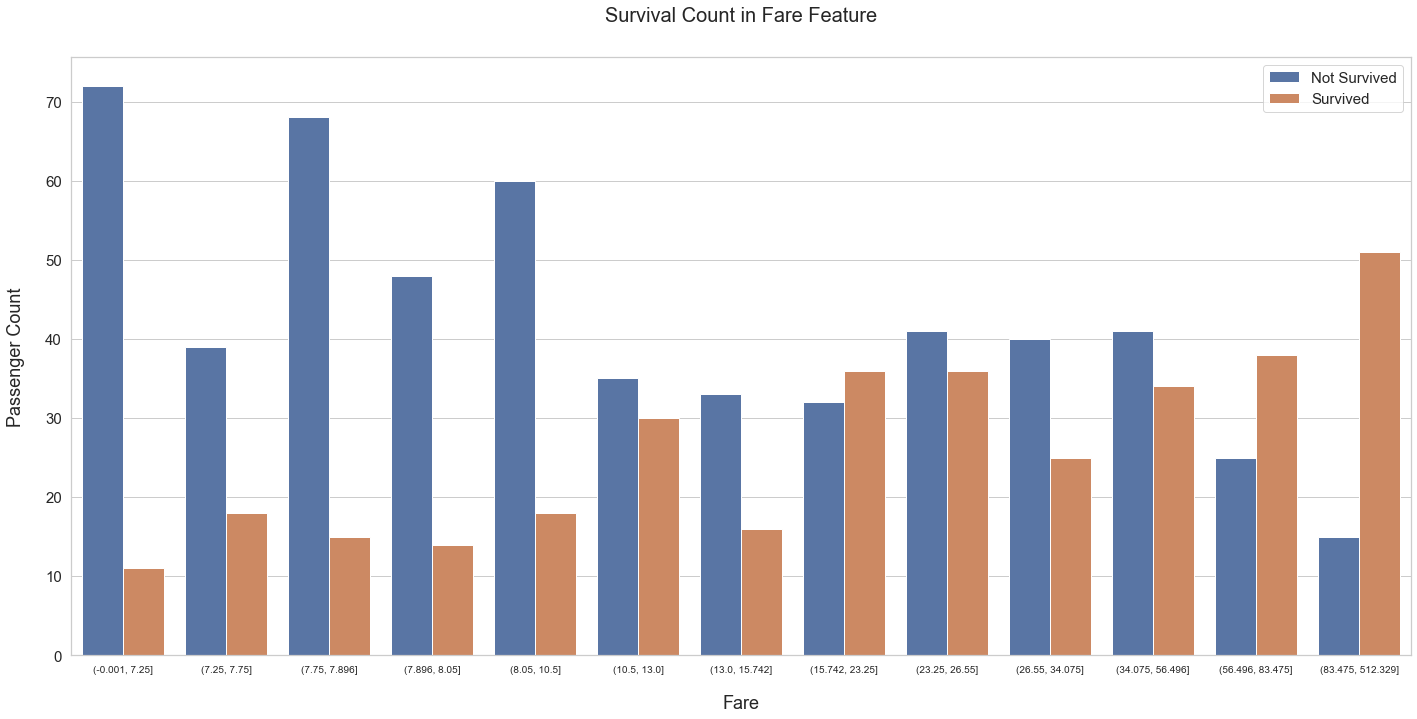

In [34]:
fig, axs = plt.subplots(figsize=(24, 11))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=18, labelpad=20)
plt.ylabel('Passenger Count', size=18, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Count in {} Feature'.format('Fare'), size=20, y=1.05)

plt.show()
# Fare feature is positively skewed and survival rate is extremely high on the right end. 
# 13 quantile-based bins are used for Fare feature. Even though the bins are too much, they provide decent amount of information gain.
# There is an unusual group (15.742, 23.25] in the middle with high survival rate (survived/not survived) that is captured in this process.
# The groups at the left side of the graph have the lowest survival rate and the groups at the right side of the graph have the highest survival rate.

In [35]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

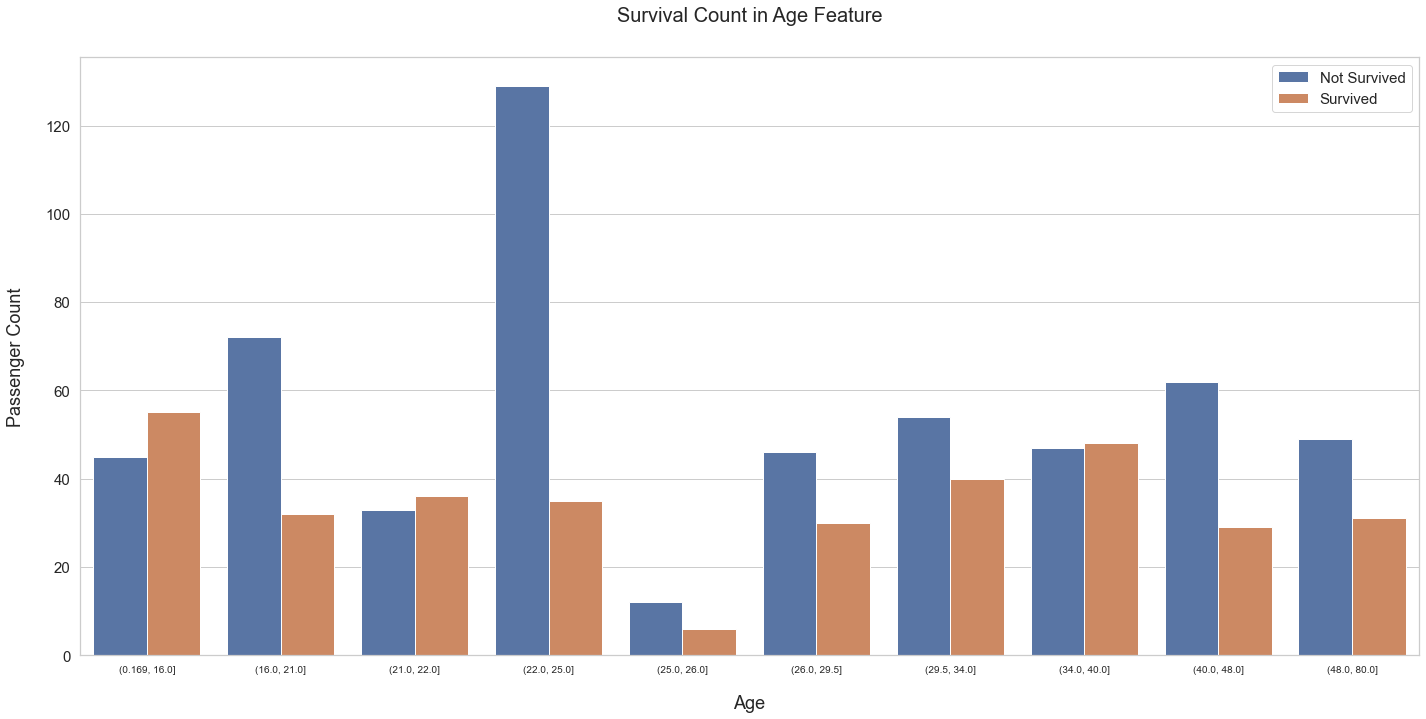

In [36]:
fig, axs = plt.subplots(figsize=(24, 11))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=18, labelpad=20)
plt.ylabel('Passenger Count', size=18, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Count in {} Feature'.format('Age'), size=20, y=1.05)

plt.show()
# Age feature has a normal distribution with some spikes and bumps. 
# 10 quantile-based bins are used for Age. 
# The 1st bin has the highest survival rate while the 4th has the lowest survival rate.
# There is also an unusual group (34.0, 40.0) with high survival rate that is captured in this process

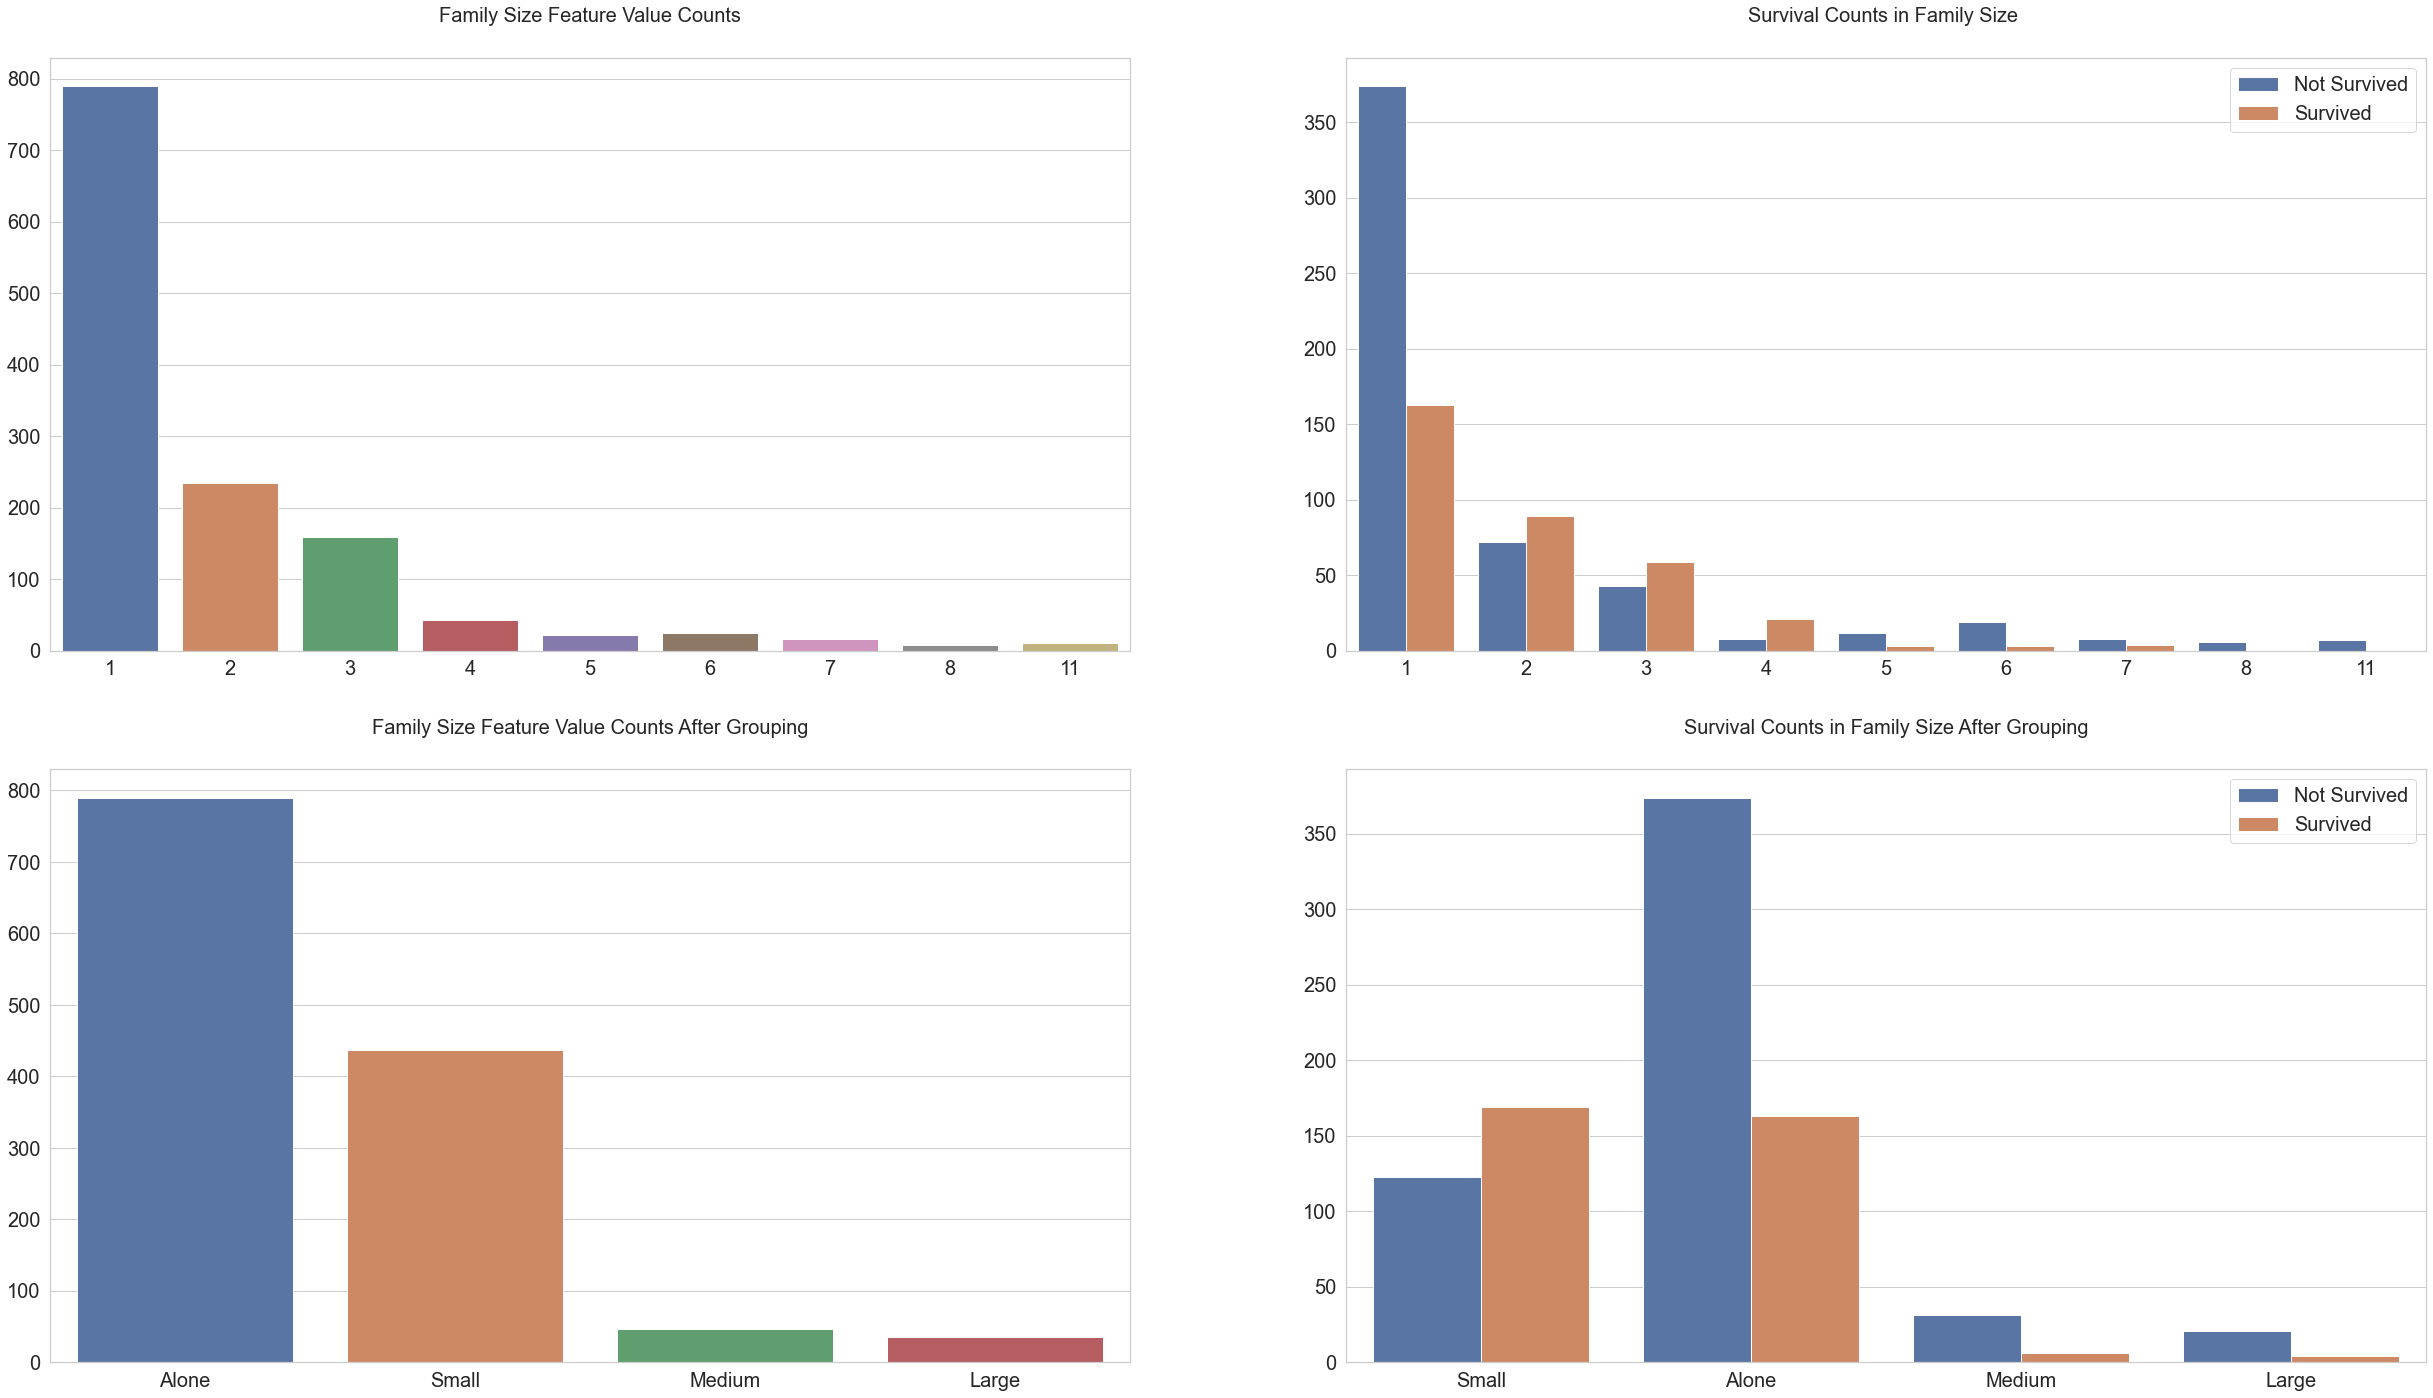

In [37]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
# Family_Size is created by adding SibSp, Parch and 1 - adding 1 at the end is the current passenger.

fig, axs = plt.subplots(figsize=(24, 24), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
# Family Size with 1 are labeled as 'Alone'
# Family Size with 2, 3 and 4 are labeled as 'Small'
# Family Size with 5 and 6 are labeled as 'Medium'
# Family Size with 7, 8 and 11 are labeled as 'Large'
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()
# Graphs show that family size is a predictor of survival because different values have different survival rates.

In [38]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')
# There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier.
# 'Ticket_Frequency' is different from 'Family_Size' because many passengers travelled along with groups consisting of friends, nannies, maids, etc. - all of whom weren't counted as family but used the same ticket.

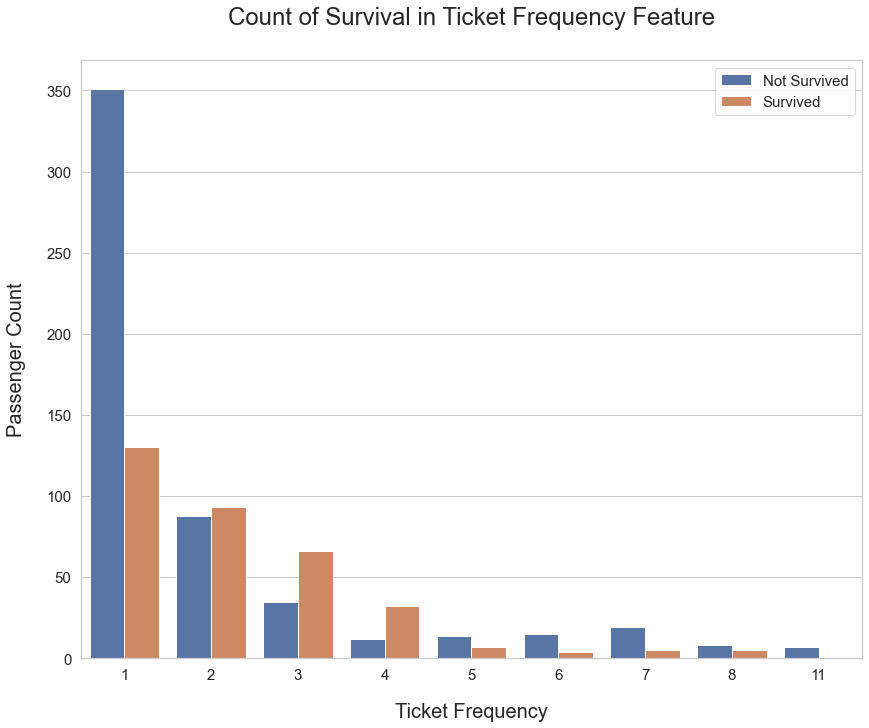

In [39]:
fig, axs = plt.subplots(figsize=(14, 11))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=20, labelpad=20)
plt.ylabel('Passenger Count', size=20, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=24, y=1.05)

plt.show()
# According to the graph below, groups with 2, 3, and 4 members had a higher survival rate, while those who traveled alone had the lowest survival rate. 
# After 4 group members, survival rate decreases drastically. 
# This pattern is very similar to Family_Size feature but, there are minor differences as mentioned in the previous block. 
# Ticket_Frequency values are not grouped like Family_Size because that would basically create the same feature with perfect correlation.

In [40]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
# The 'Title' feature is created by extracting the prefix before the 'Name' feature.

df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1
# 'Is_Married' is a binary feature based on the Mrs title. This title has the highest survival rate among other female titles and needs to be a feature because all female titles are grouped with each other.

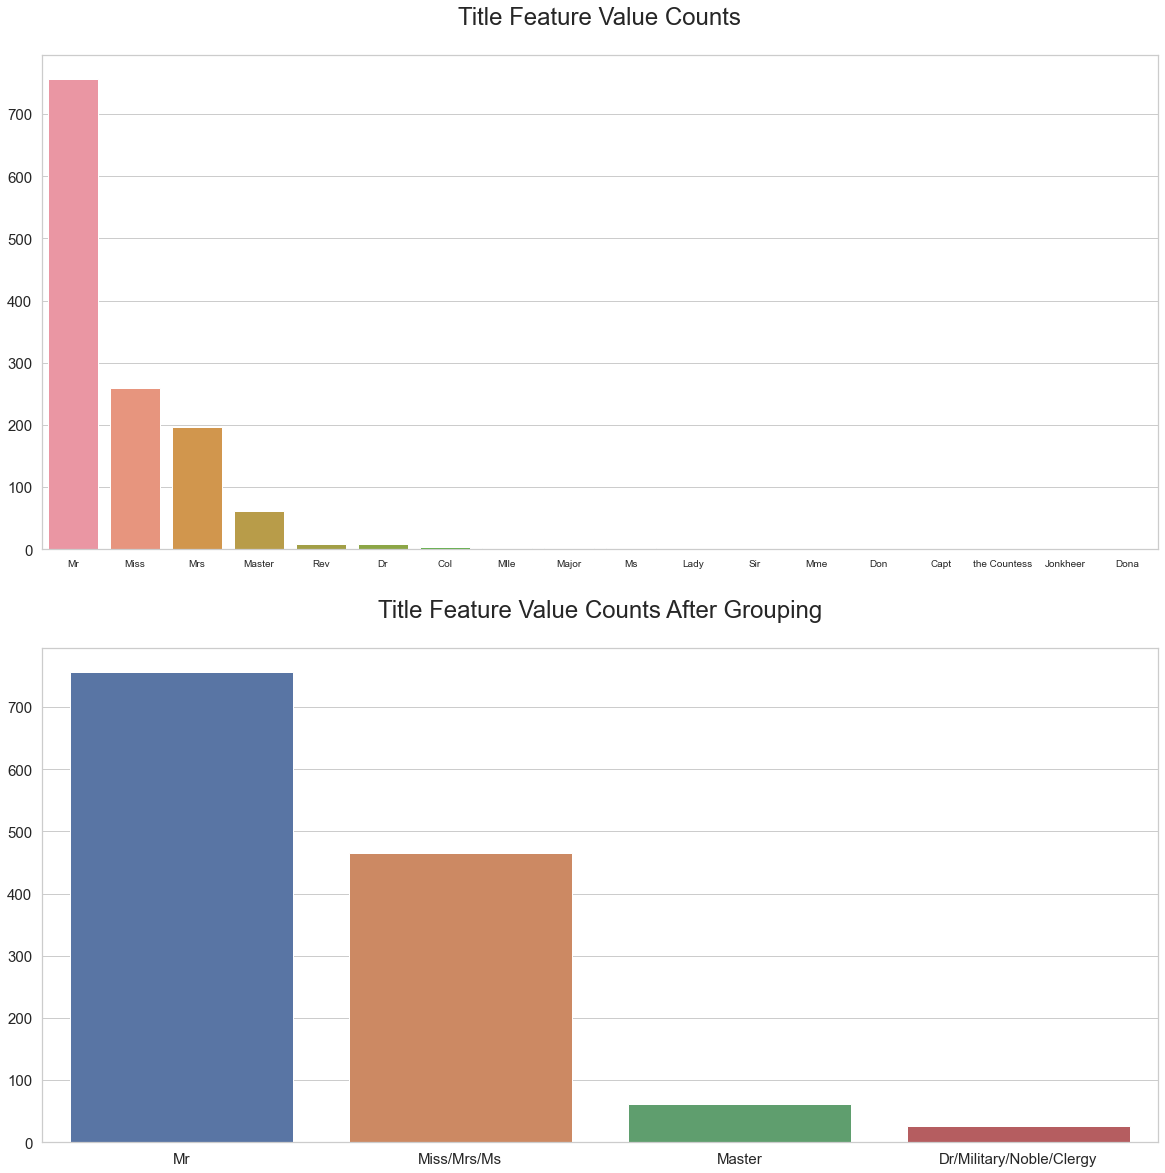

In [41]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])
axs[0].set_title('Title Feature Value Counts', size=24, y=1.05)
axs[0].tick_params(axis='x', labelsize=10)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=24, y=1.05)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

plt.show()
# According to first graph below, there are many titles that are occuring very few times. Some of those titles don't seem correct and they need to be replaced. 
# Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona titles are replaced with Miss/Mrs/Ms because all of them are female. 
# Values like Mlle, Mme and Dona are actually the name of the passengers, but they were previously classified as titles because the 'Name' feature is split by comma. 
# Dr, Col, Major, Jonkheer, Capt, Sir, Don and Rev titles are replaced with Dr/Military/Noble/Clergy because those passengers have similar characteristics. 
# Master is a unique title. It is given to male passengers below age 26. They have the highest survival rate among all males.

In [44]:
df_all.columns

Index(['Unnamed: 0', 'Age', 'Deck', 'Embarked', 'Fare', 'Name', 'Parch',
       'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket',
       'Unnamed: 0.1', 'Family_Size', 'Family_Size_Grouped',
       'Ticket_Frequency', 'Title', 'Is_Married', 'Family'],
      dtype='object')

### Target Encoding

In [43]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):        
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families
# extract_surname function is used to extract surnames of passengers from the 'Name' feature. 

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]
# 'Family' feature is thus created using the extract_surname function. This feature is important in order to group passengers in the same family.

In [45]:
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]
# Created a list of families and tickets that are occurring in both training and test set
# A list of family names (non_unique_families), that are occurring in both training and test set is created.

df_family_survival_rate = df_train.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = df_train.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}


for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]
    # Checked if a family exists in both training and test set, and has members more than 1
     

for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]
    # Checked if a ticket exists in both training and test set, and has members more than 1

In [46]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA
# Family_Survival_Rate is calculated from families in training set since there is no Survived feature in test set. 
# The survival rate is calculated for families with more than 1 members in that list, and stored in Family_Survival_Rate feature.
# An extra binary feature Family_Survival_Rate_NA is created for families that are unique to the test set. 
# This extra feature is also necessary because there is no way to calculate those families' survival rate and implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate.

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []
# Ticket_Survival_Rate and Ticket_Survival_Rate_NA features are also created with the same method. 

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

In [47]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2
# Ticket_Survival_Rate and Family_Survival_Rate are averaged and become Survival_Rate.
# Ticket_Survival_Rate_NA and Family_Survival_Rate_NA are also averaged and become Survival_Rate_NA.

### Feature Transformation

In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
# Embarked, Sex, Deck , Title and Family_Size_Grouped are object type.
# Age and Fare features are category type. 
# LabelEncoder basically labels the classes from 0 to n, converting the aforementioned types into numerical type.
# This process is necessary for the model to learn from these features.

### One-hot Encoding

In [50]:
categorical_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in categorical_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)
# The categorical features (Pclass, Sex, Deck, Embarked, Title) are converted to one-hot encoded features with OneHotEncoder. 
# 'Age' and 'Fare' features are not converted because they are ordinal, unlike the other features. Label Encoding must be used for such ordinal features.

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

In [52]:
def concatenated_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)
df_all = concatenated_df(df_train, df_test)
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']
# 'Family_Size' is created by adding 'Parch' and 'SibSp' features and 1. 
# 'Ticket_Frequency' is created by counting the occurrence of Ticket values.
# 'Name' is quite useful: First, 'Title' and 'Is_Married' features are created from the title prefix in the names.
# Second, 'Family_Survival_Rate' and 'Family_Survival_Rate_NA' features are created by target encoding the surname of the passengers. 
# 'Ticket_Survival_Rate' is created by target encoding the Ticket feature. 
# 'Survival_Rate' feature is created by averaging the 'Family_Survival_Rate' and 'Ticket_Survival_Rate' features.
df_all.drop(columns=drop_cols, inplace=True)
df_all.head()

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Embarked_1,...,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4,Unnamed: 0,Unnamed: 0.1
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0,0,0
1,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0,1,1
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0,2,2
3,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0,3,3
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0,4,4


In [54]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')
df_all.to_csv('df_all.csv')